# SoC Checkpoint 1
### Linisha Yellapu - 210070049

## Step 1: Data Collection

In [1]:
# pip install yfinance --upgrade --no-cache-dir

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot

In [4]:
stock_df = yf.download("RELIANCE.NS", start="2020-01-01", end="2021-12-30")

[*********************100%%**********************]  1 of 1 completed


In [5]:
# stock_df

In [6]:
stock_data = stock_df

In [ ]:
# stock_data.reset_index(inplace =True)

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2020-01-01 to 2021-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       497 non-null    float64
 1   High       497 non-null    float64
 2   Low        497 non-null    float64
 3   Close      497 non-null    float64
 4   Adj Close  497 non-null    float64
 5   Volume     497 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.2 KB


In [8]:
stock_data = stock_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])

In [9]:
stock_data

,Close
Date,
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-06,1372.870605
2020-01-07,1393.991699
...,...
2021-12-23,2183.125000
2021-12-24,2190.093750
2021-12-27,2187.739990


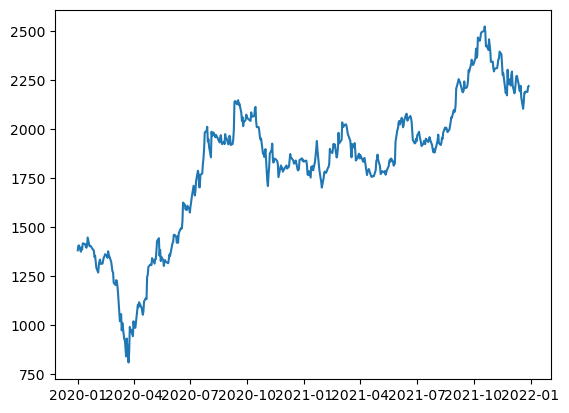

In [10]:
plt.plot(stock_data['Close'])

## Step 2: Data preparation

In [11]:
all_dates = pd.date_range(start=stock_data.index.min(), end=stock_data.index.max())

In [12]:
all_dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', length=729, freq='D')

In [13]:
stock_data = stock_data.reindex(all_dates)

In [14]:
stock_data

,Close
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-04,NaN
2020-01-05,NaN
...,...
2021-12-25,NaN
2021-12-26,NaN
2021-12-27,2187.739990
2021-12-28,2213.722412


In [15]:
stock_data.interpolate(method='time', inplace=True)  ## Filling missing values

In [16]:
stock_data

,Close
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-04,1394.601237
2020-01-05,1383.735921
...,...
2021-12-25,2189.309163
2021-12-26,2188.524577
2021-12-27,2187.739990
2021-12-28,2213.722412


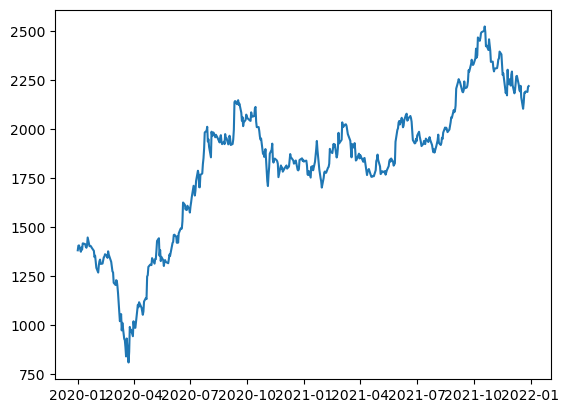

In [17]:
plt.plot(stock_data['Close'])

#### Normalise

In [18]:
avg, dev = stock_data.mean(), stock_data.std()

In [19]:
stock_normalised = (stock_data - avg) / dev

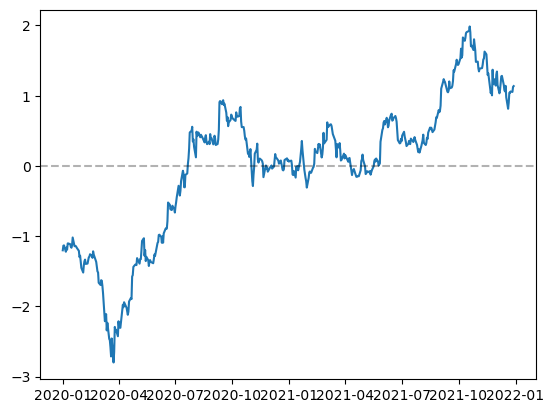

In [20]:
plt.plot(stock_normalised)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [21]:
# stock_normalised

## Model implementation and evaluation

C:\Users\LINISHA YELLAPU\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


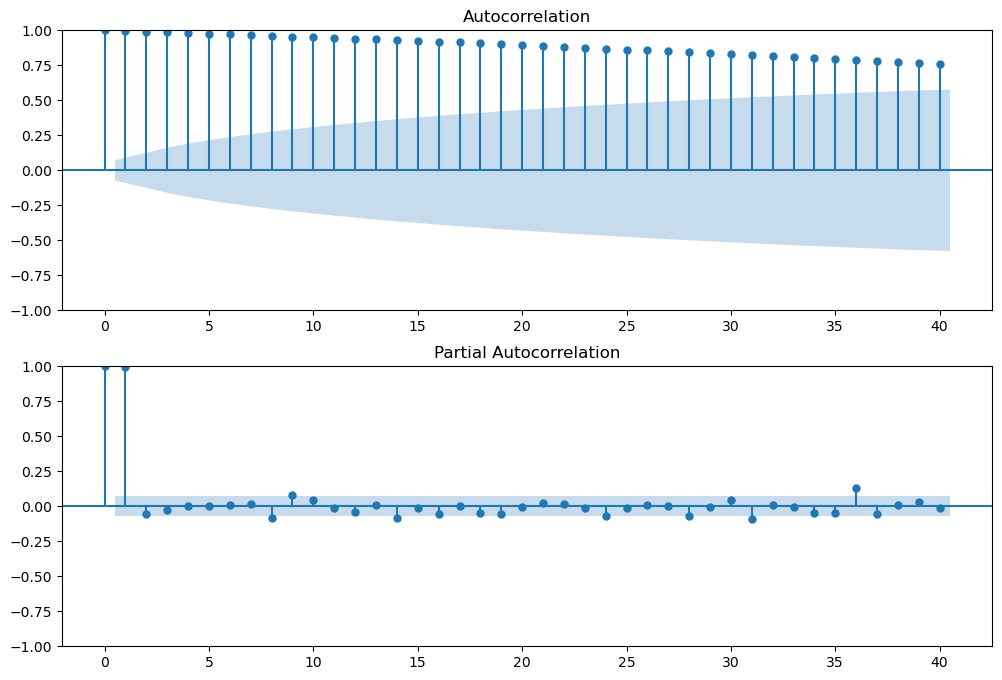

In [22]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_normalised.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_normalised, lags=40, ax=ax2)

### ARIMA model

In [23]:
def arima(data, p, d, q):
  """
  Implements an ARIMA(p, d, q) model.

  Args:
    data: The time series data.
    p: The order of the AR model.
    d: The order of differencing.
    q: The order of the MA model.

  Returns:
    The ARIMA(p, d, q) model.
  """

  model = ARIMA(data, order=(p, d, q))
  model = model.fit()
  return model


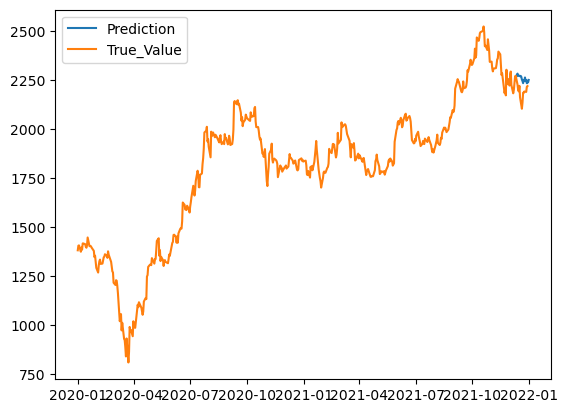

In [24]:
model_arima = arima(stock_data['Close'][:-20] , 2 ,0 , 34) # getting p and q values from acf and pacf
predict_arima = model_arima.predict(len(stock_data['Close'])-20 , len(stock_data['Close'])+1 )
plt.plot(predict_arima , label = 'Prediction')
plt.plot(stock_data['Close'] , label = 'True_Value')
plt.legend()
plt.show()

In [25]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  709
Model:                ARIMA(2, 0, 34)   Log Likelihood               -3317.056
Date:                Tue, 25 Jun 2024   AIC                           6710.113
Time:                        22:42:15   BIC                           6883.539
Sample:                    01-01-2020   HQIC                          6777.113
                         - 12-09-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1799.7755    235.677      7.637      0.000    1337.856    2261.695
ar.L1          0.5522      0.481      1.149      0.251      -0.390       1.494
ar.L2          0.4398      0.478      0.920      0.3

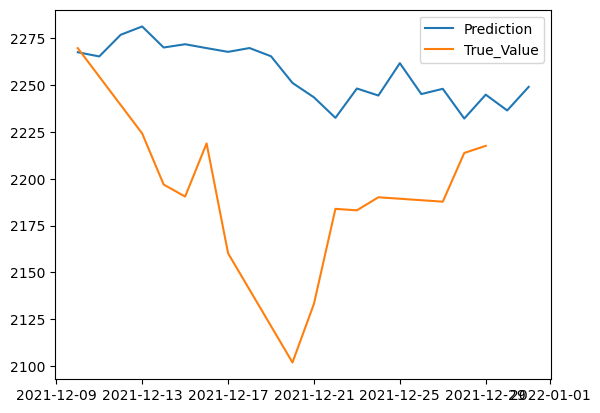

In [26]:
plt.plot(predict_arima , label = 'Prediction')
plt.plot(stock_data['Close'][-20:] , label = 'True_Value')
plt.legend()
plt.show()

In [27]:
first_diff = stock_data.diff()[1:]

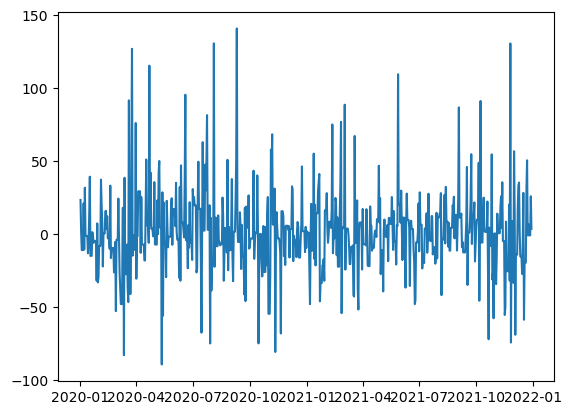

In [28]:
plt.plot(first_diff)

### SARIMA model

In [29]:
def sarima(data, p, d, q, P, D, Q, s):
  """
  Implements a SARIMA(p, d, q)(P, D, Q)s model.

  Args:
    data: The time series data.
    p: The order of the AR model.
    d: The order of differencing.
    q: The order of the MA model.
    P: The order of the AR model for the seasonal component.
    D: The order of differencing for the seasonal component.
    Q: The order of the MA model for the seasonal component.
    s: The seasonal period.

  Returns:
    The SARIMA(p, d, q)(P, D, Q)s model.
  """

  model = SARIMAX(data, order=(p, d, q), seasonal_order = (P, D, Q, s))
  model = model.fit()
  return model

C:\Users\LINISHA YELLAPU\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\LINISHA YELLAPU\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\LINISHA YELLAPU\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


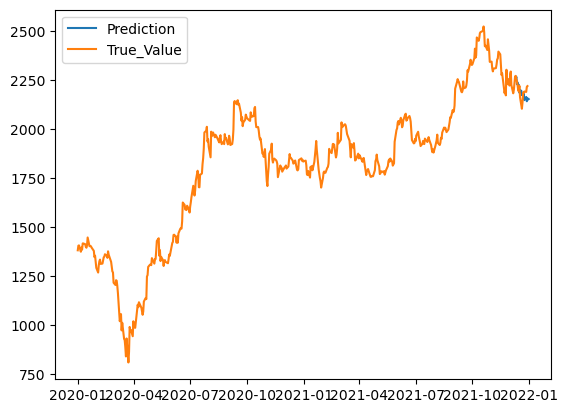

In [30]:
model_sarima = sarima(stock_data['Close'][:-20] , 1, 0, 1 , 3, 0 ,34,4) 
predict_sarima = model_sarima.predict(len(stock_data['Close'])-20 , len(stock_data['Close'])+1 )
plt.plot(predict_sarima , label = 'Prediction')
plt.plot(stock_data['Close'] , label = 'True_Value')
plt.legend()
plt.show()

In [31]:
print(model_sarima.summary())

                                                                                                    SARIMAX Results                                                                                                    
Dep. Variable:                                                                                                                                                           Close   No. Observations:                  709
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 4)   Log Likelihood               -3360.876
Date:                                                                                                                                                         Tue, 25 Jun 2024   AIC                           6801.751
Time:                                                                                                                                   

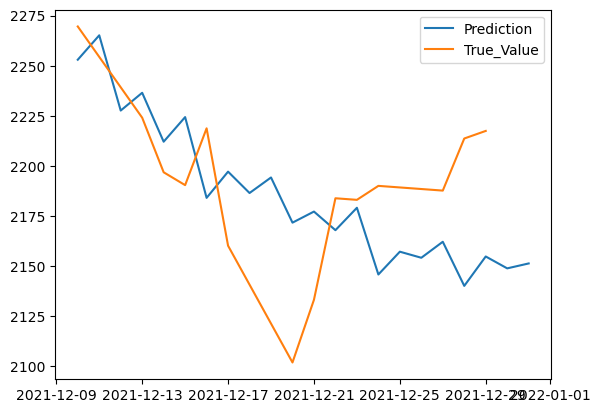

In [32]:
plt.plot(predict_sarima , label = 'Prediction')
plt.plot(stock_data['Close'][-20:] , label = 'True_Value')
plt.legend()
plt.show()

### Exponential smoothing

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#### Simple Exponential Smoothing

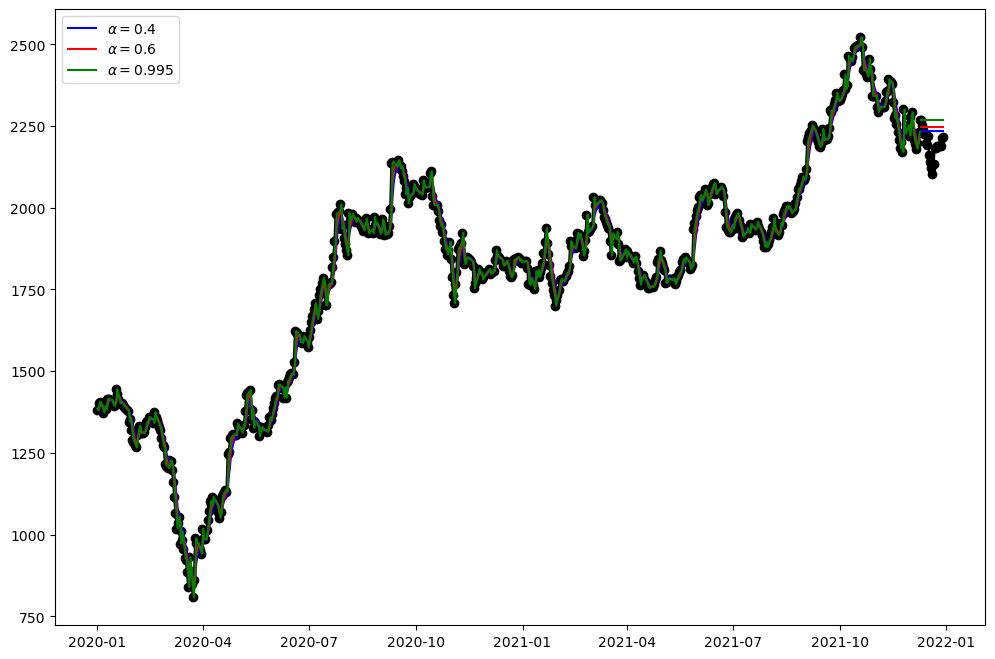

In [34]:
fit1 = SimpleExpSmoothing(stock_data[:-20], initialization_method="heuristic").fit(
    smoothing_level=0.4, optimized=False
)
fcast1 = fit1.forecast(20).rename(r"$\alpha=0.4$")
fit2 = SimpleExpSmoothing(stock_data[:-20], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(20).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(stock_data[:-20], initialization_method="estimated").fit()
fcast3 = fit3.forecast(20).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(stock_data, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


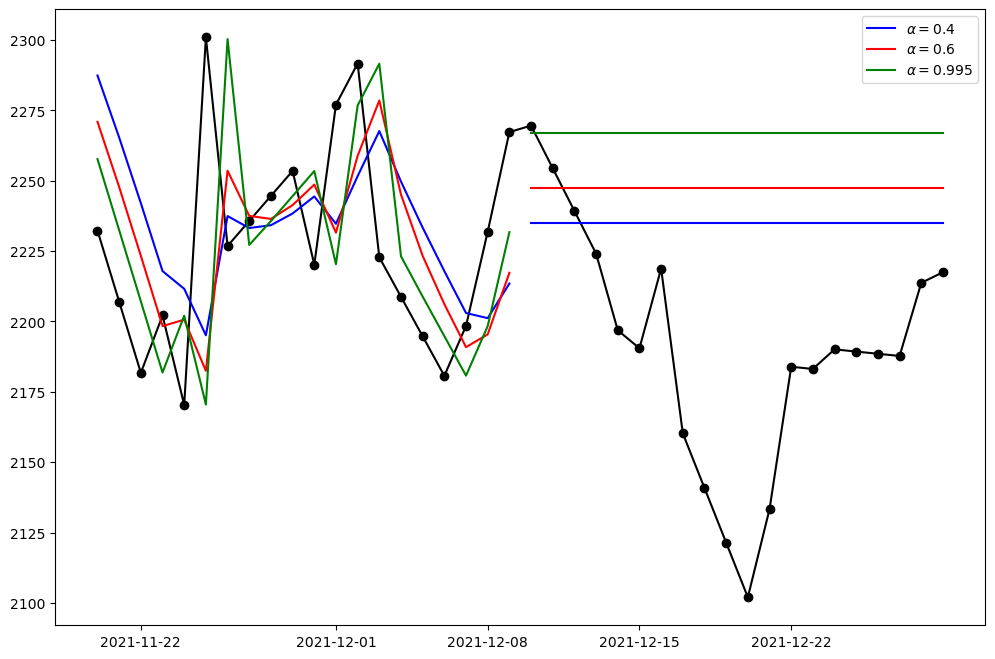

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(stock_data[-40:], marker="o", color="black")
plt.plot(fit1.fittedvalues[-20:], color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.plot(fit2.fittedvalues[-20:], color="red")
(line2,) = plt.plot(fcast2, color="red")
plt.plot(fit3.fittedvalues[-20:], color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


## Results presentation

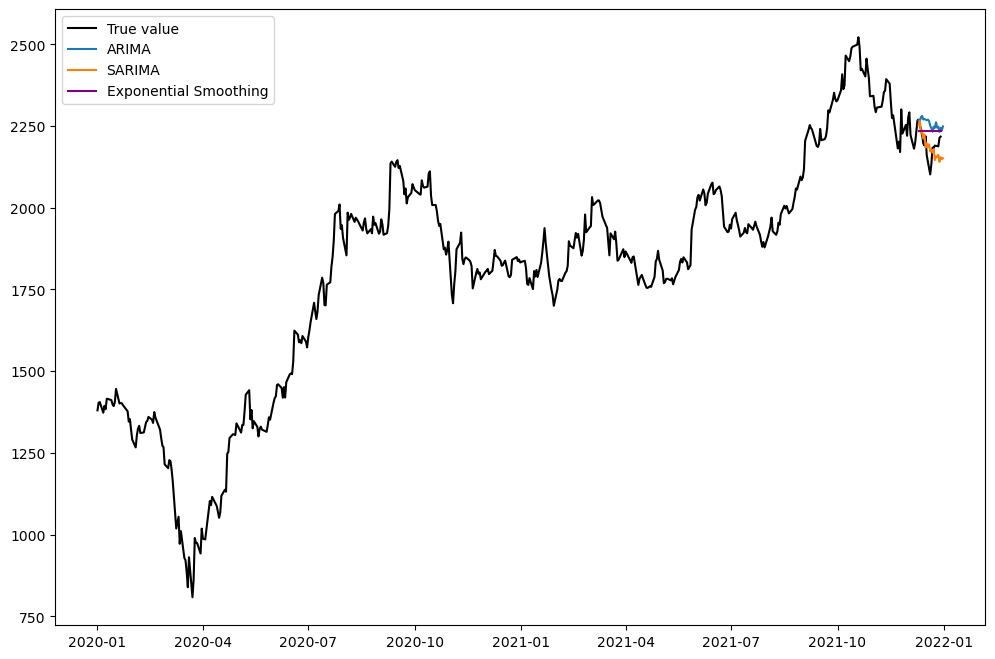

In [36]:
plt.figure(figsize=(12, 8))
(line1,) = plt.plot(stock_data, color="black", label= 'True value')
(line2,) = plt.plot(predict_arima , label = 'ARIMA')
(line3,) = plt.plot(predict_sarima , label = 'SARIMA')
(line4,) = plt.plot(fcast1, color = "purple")
plt.legend([line1, line2, line3, line4], ['True value', 'ARIMA', 'SARIMA', 'Exponential Smoothing'])

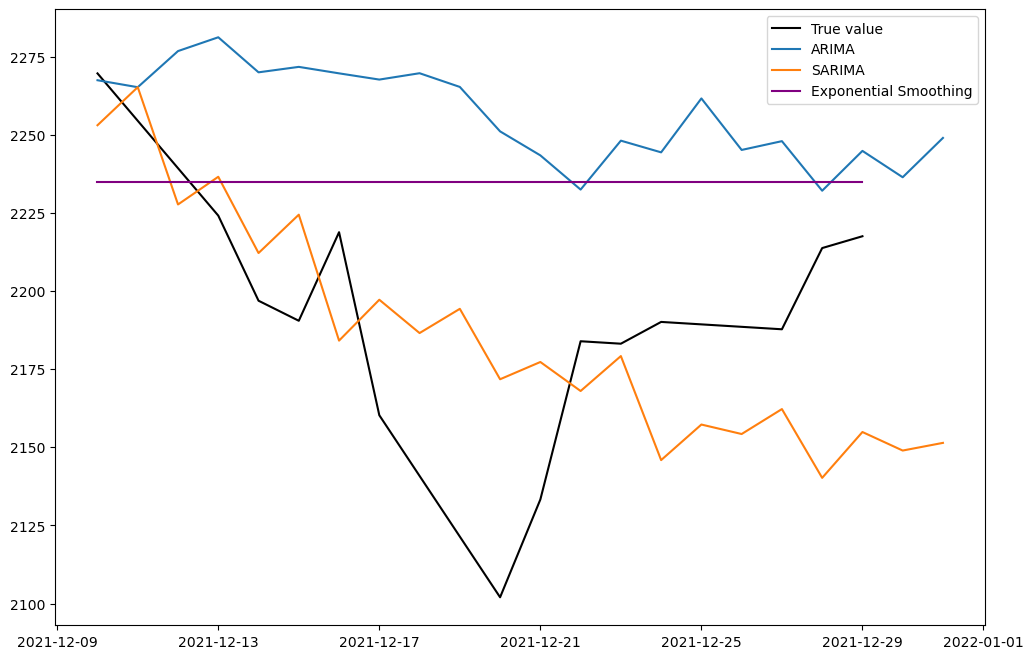

In [37]:
plt.figure(figsize=(12, 8))
(line1,) = plt.plot(stock_data[-20:], color="black", label= 'True value')
(line2,) = plt.plot(predict_arima , label = 'ARIMA')
(line3,) = plt.plot(predict_sarima , label = 'SARIMA')
(line4,) = plt.plot(fcast1, color = "purple")
plt.legend([line1, line2, line3, line4], ['True value', 'ARIMA', 'SARIMA', 'Exponential Smoothing'])

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mae_arima = mean_absolute_error(stock_data[-20:], predict_arima[:-2])
rmse_arima = np.sqrt(mean_squared_error(stock_data[-20:], predict_arima[:-2]))
                     
mae_sarima = mean_absolute_error(stock_data[-20:], predict_sarima[:-2])
rmse_sarima = np.sqrt(mean_squared_error(stock_data[-20:], predict_sarima[:-2]))
                      
mae_exp = mean_absolute_error(stock_data[-20:], fcast1)
rmse_exp = np.sqrt(mean_squared_error(stock_data[-20:], fcast1))

In [40]:
print(mae_arima, rmse_arima)
print(mae_sarima, rmse_sarima)
print(mae_exp, rmse_exp)

67.71809416833753 79.0984959854918
34.83333695092576 40.769301539817505
50.57358265932389 61.39123011520592


### Model Performance

| Model | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE) |
|--------|-------|-------|
| ARIMA | 67.718 | 79.098 |
| SARIMA | 34.833 | 40.769 |
| Exponential Smoothing | 50.574 | 61.391 |

## Summary

- 2 years of RELIANCE.NS data is trained on to forecast 20 days closing price
- Graphs depicting individual comparisions and among the models are plotted
- Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are calculated
- SARIMA model has performed better than ARIMA and simple exponential smoothing
- Areas of improvement include implementing exponential smoothing as a more sohisticated model. Here, I have implemented a simple model
- Rolling forecast origin model theory learnt - implementation to be done for further insights